<h1 style="font-size:3rem;color:Black;">  Section 3.4 Obtention de résultats préliminaires  </h1>

## 1.Recodez la langue d’écriture de la thèse en utilisant quatre niveaux (levels en anglais) : Anglais, Français, Bilingue (enfr et fren), et Autres.

In [1]:
import pandas as pd
import numpy as np
import datetime
data=pd.read_csv('PhD_v2.csv', on_bad_lines='skip',low_memory=False)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

In [2]:
langue=data['Langue de la these'].unique()
data1=data.copy()
print('il y a totalle '+ str(len(langue))+ ' langue ecrite different ')
print(langue)


il y a totalle 206 langue ecrite different 
[nan 'fr' 'en' 'ro' 'es' 'de' 'FR' 'zh' 'bs' 'it' 'co' 'fren' 'enfr'
 'enzh' 'pt' 'frensl' 'fres' 'zhen' 'esen' 'itfr' 'frel' 'cs' 'frpten'
 'hu' 'enfrde' 'esenfr' 'frpl' 'elfr' 'frhu' 'frar' 'itfren' 'frit' 'frzh'
 'enfrzh' 'frvi' 'frenes' 'ru' 'defr' 'pl' 'bg' 'frkm' 'kkenfr' 'frcs'
 'ptfren' 'el' 'enfreu' 'pten' 'frpt' 'esfr' 'ptfr' 'rufr' 'br' 'cafr'
 'sr' 'enru' 'ensl' 'frde' 'frja' 'frla' 'ar' 'ca' 'fraf' 'eu' 'enesfr'
 'freu' 'rofr' 'frgrc' 'enpt' 'encsfr' 'he' 'enptfr' 'enit' 'fresen'
 'enpl' 'sv' 'eufr' 'enfrpt' 'frbr' 'ukfren' 'frruen' 'arfr' 'hyfrru'
 'csfrsk' 'frhe' 'frru' 'brfr' 'akfr' 'zhfr' 'frms' 'enfrpl' 'frmn'
 'enfrit' 'envi' 'frro' 'frfy' 'frsl' 'enfres' 'frqu' 'as' 'frln' 'frenpt'
 'abfr' 'uk' 'roen' 'plen' 'frenzh' 'frendees' 'enfrcs' 'itzh' 'cofr'
 'frtch' 'eufres' 'ja' 'enbo' 'frsa' 'itfrhe' 'froc' 'frkmsa' 'hyfr'
 'zhfrit' 'nl' 'nlen' 'csfr' 'enesfrca' 'enar' 'amfr' 'frtr' 'frsakm'
 'enarfr' 'itlafr' 'frff' 'itfrla' '

In [3]:
for row in range(len(data1['Langue de la these'])):
    if data1.loc[row,'Langue de la these']=='en':
        data1.loc[row,'Langue categori']=1
    elif data1.loc[row,'Langue de la these']=='fr':
        data1.loc[row,'Langue categori']=2
    elif (data1.loc[row,'Langue de la these']=='enfr')|(data1.loc[row,'Langue de la these']=='fren'):
        data1.loc[row,'Langue categori']=3
    else :
        data1.loc[row,'Langue categori']=4

In [4]:
print( data1['Langue categori'])

0         4.0
1         4.0
2         2.0
3         4.0
4         4.0
         ... 
447639    4.0
447640    4.0
447641    4.0
447642    2.0
447643    2.0
Name: Langue categori, Length: 447644, dtype: float64


## 2.Montrez avec le graphique approprié et sur une période pertinente comment le choix de la langue d’écriture a évolué au fil des ans.

In [6]:
En_evo=data1.groupby(['Year']).apply(lambda x: x[x['Langue categori']==1]['Year'].count())
Fr_evo=data1.groupby(['Year']).apply(lambda x: x[x['Langue categori']==2]['Year'].count())
Bi_evo=data1.groupby(['Year']).apply(lambda x: x[x['Langue categori']==3]['Year'].count())
Autre_evo=data1.groupby(['Year']).apply(lambda x: x[x['Langue categori']==4]['Year'].count())

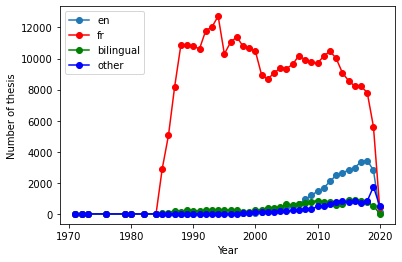

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
fig,ax=plt.subplots()
plt.plot(En_evo,'o-',label = "en")
plt.plot(Fr_evo,'ro-',label = "fr")
plt.plot(Bi_evo,'go-',label = "bilingual")
plt.plot(Autre_evo,'bo-',label = "other")
plt.xlabel('Year')
plt.ylabel('Number of thesis')
plt.legend()
plt.show()
fig.savefig('Evo_Language.png', dpi=200) 

In [8]:
print(len (data1['Discipline'].unique()))
dis=data1['Discipline'].unique()
print( dis[0:50] )

24263
['Driot prive'
 'Mecanique des solides, des materiaux, des structures et des surfaces'
 'Medecine' 'Science politique' 'Geographie' 'Droit public'
 'Etudes de genre' 'Droit prive'
 'Philosophie (metaphysique, epistemologie, esthetique)'
 'Histoire du droit et des institutions' 'Etudes anglophones'
 'Psychologie' 'Anthropologie' 'Histoire' 'Arts et langages'
 'Droit penal et sciences criminelles' 'Sciences economiques'
 'Etudes hispaniques' "Sciences de l'information et de la communication"
 'Sciences de gestion' 'Droit international' 'Sciences du langage'
 'Geographie physique' 'Histoire moderne et contemporaine' 'Informatique'
 'Mathematiques et informatique appliquees aux sciences sociales (miass)'
 'Histoire et archeologie medievales' 'Etudes occitanes'
 'Histoire des religions' 'Litteratures francaise et francophone'
 'Etudes hispano-americaines' 'Histoire des sciences et des techniques'
 'Etudes iberiques et latino americaines' "Histoire de l'art" 'Sociologie'
 'Etudes germa

In [9]:
Evo_En=pd.DataFrame()
Evo_En=data1.loc[data1['Langue categori']==1,['Discipline','Year']]
Evo_Fr=pd.DataFrame()
Evo_Fr=data1.loc[data1['Langue categori']==2,['Discipline','Year']]
Evo_Bi=pd.DataFrame()
Evo_Bi=data1.loc[data1['Langue categori']==3,['Discipline','Year']]
Evo_Oth=pd.DataFrame()
Evo_Oth=data1.loc[data1['Langue categori']==4,['Discipline','Year']]